In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection




In [2]:
%matplotlib notebook

$E_{radius} \colon = 6400 \mathrm{km}$ the radius of the Earth


$$
k^+ = \frac{\sin(\sigma + 105^\circ) \cdot s}{\sin(65^\circ - 2 \eta)}, \\
k^- = \frac{\sin(10^\circ - \sigma + 2\eta) \cdot s}{\sin(65^\circ - 2\eta)},
$$

where $s$ is the length of the secant of the tile's border points,
$\sigma$ is the angle between the tangent to the Earth's surface and the secant between
these border points,
and $\eta$ as before.


$gamma_1 = 90+\lambda$

$s=2*R*\sin(\eta)$

$\sigma=\eta$

$R+h=\sqrt{R^2+k_+^2+2Rk_+\cos(\gamma_1)}$

In [3]:
def height(eta):
    s = 2*E_radius * np.sin(np.deg2rad(eta))
    kp = np.sin(2*ra+np.deg2rad(eta)-angle_high)*s/np.sin(angle_high-np.deg2rad(2*eta)-angle_low)
    d = np.sqrt(E_radius**2 + kp**2 - 2*E_radius*kp * np.cos(np.deg2rad(90)+angle_low))
    return d

In [4]:
print(f"20: {height(20)}, 24: {height(24)}, 30: {height(30)}")

20: 11481.488648325661, 24: 16224.188885890648, 30: 53408.64687063386


In [2]:
E_radius = 6400

# Min_height is the yellow circle
min_height = 7000

# How high the cones are drawn
max_height = 100000
angle_low = np.deg2rad(10)
angle_high = np.deg2rad(75)
ra = np.deg2rad(90)

$\vartheta$ the vector of angles of the Earth for which to sample the boundaries

In [5]:
def draw_cone(xe, ye, theta):
    # line which draws the limit of the high angle in the counter-clockwise direction
    x_high1 = xe + max_height * np.cos(theta) - max_height * np.tan(ra-angle_high)*np.sin(theta)
    y_high1 = ye + max_height * np.sin(theta) + max_height * np.tan(ra-angle_high)*np.cos(theta)
    # line -- " -- for the clockwise direction
    x_high2 = xe + max_height * np.cos(theta) - max_height * np.tan(-ra+angle_high)*np.sin(theta)
    y_high2 = ye + max_height * np.sin(theta) + max_height * np.tan(-ra+angle_high)*np.cos(theta)
    # line which draws the limit of the low angle in the counter-clockwise direction
    x_low1 = xe + max_height * np.cos(theta) - max_height * np.tan(ra-angle_low)*np.sin(theta)
    y_low1 = ye + max_height * np.sin(theta) + max_height * np.tan(ra-angle_low)*np.cos(theta)
    x_low2 = xe + max_height * np.cos(theta) - max_height * np.tan(-ra+angle_low)*np.sin(theta)
    y_low2 = ye + max_height * np.sin(theta) + max_height * np.tan(-ra+angle_low)*np.cos(theta)
    return x_high1, y_high1, x_high2, y_high2, x_low1, y_low1, x_low2, y_low2

In [6]:
n_points = 3600
theta = np.linspace(0, np.pi, n_points)

# How accurately we want to sample the circle (the Earth)
x_e = E_radius * np.cos(theta)
y_e = E_radius * np.sin(theta)
# Minimum circle of satellite trajectory height (due to Doppler)
x_o = (E_radius+min_height) * np.cos(theta)
y_o = (E_radius+min_height) * np.sin(theta)

x1, y1, x2, y2, x3, y3, x4, y4 = draw_cone(x_e, y_e, theta)

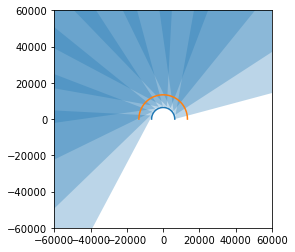

In [7]:
# Plot space visible from the boundaries
plt.figure()
plt.plot(x_e,y_e)
plt.plot(x_o,y_o)
n_sats = 10
forward_lobes = []
rear_lobes= []
for i in range(0,n_points,n_points//n_sats):
    #plt.plot((x_e[i],x1), (y_e[i],y1))
    #plt.plot((x_e[i],x2), (y_e[i],y2))
    #plt.plot((x_e[i],x3), (y_e[i],y3))
    #plt.plot((x_e[i],x4), (y_e[i],y4))
    forward_lobes.append(Polygon([[x_e[i],y_e[i]],[x1[i],y1[i]],[x3[i],y3[i]]]))
    rear_lobes.append(Polygon([[x_e[i],y_e[i]],[x2[i],y2[i]],[x4[i],y4[i]]]))

plt.gca().add_collection(PatchCollection(forward_lobes, alpha=0.3))
#plt.gca().add_collection(PatchCollection(rear_lobes, alpha=0.1))
plt.xlim([-60000,60000])
plt.ylim([-60000,60000])
plt.gca().set_aspect('equal', adjustable='box')

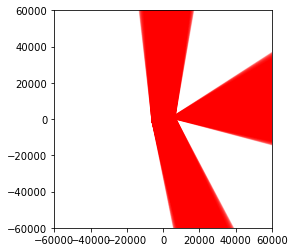

In [8]:
# Plot space NOT visible from all points in the first sector
uppper_shadow = []

# lower shader is a bit of a hack
lower_shadow = []
for i in range(0,n_points//n_sats):
    #plt.plot((x_e[i],x1), (y_e[i],y1))
    #plt.plot((x_e[i],x2), (y_e[i],y2))
    #plt.plot((x_e[i],x3), (y_e[i],y3))
    #plt.plot((x_e[i],x4), (y_e[i],y4))
    uppper_shadow.append(Polygon([[x_e[i],y_e[i]],[x1[i],y1[i]],[x2[i],y2[i]]]))
    lower_shadow.append(Polygon([[x_e[i],y_e[i]],[x3[i],y3[i]],[-x_e[i],-y_e[i]],[x4[i],y4[i]]]))

plt.gca().add_collection(PatchCollection(uppper_shadow, alpha=0.05, color='red'))
plt.gca().add_collection(PatchCollection(lower_shadow, alpha=0.05, color='red'))
plt.xlim([-60000,60000])
plt.ylim([-60000,60000])
plt.gca().set_aspect('equal', adjustable='box')